# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

#FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

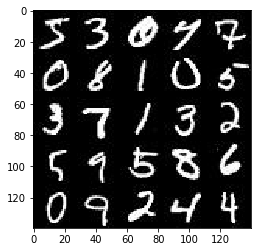

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

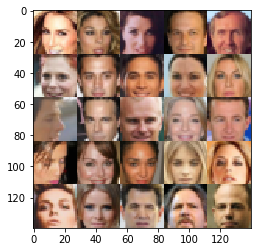

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.9.0


C:\Users\amkle\Miniconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_imges = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name = 'input_imges')
    z_data = tf.placeholder(tf.float32, shape=(None, z_dim), name = 'z_data')
    learning_rate = tf.placeholder(tf.float32, shape=None, name = 'learning_rate')

    return input_imges, z_data, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.01
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 32x32x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        # 16x16x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 8x8x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x256

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        output = tf.sigmoid(logits)
        
    return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function

    with tf.variable_scope('generator', reuse = not is_train):
    # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=True)
        x1 = tf.maximum(0.1 * x1, x1)
        # 7x7x256 now
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(0.1 * x2, x2)
        # 14x14x128 now
        
        # Output layer
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x2, training=True)
        x3 = tf.maximum(0.1 * x3, x3)
        # 28x28x3 now
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same')
        out = tf.tanh(logits)
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    # Build the model
    g_model = generator(input_z, out_channel_dim)
    # g_model is the generator output
    
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    smooth = 0.1
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)*(1.0 - smooth)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    return d_loss, g_loss

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [12]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    out_channel_dim = [1 if data_image_mode == 'L' else 3]
    
    real_inputs, z_inputs, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    
    d_loss, g_loss = model_loss(real_inputs, z_inputs, data_shape[3])
    
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    batch_num = 0
    saver = tf.train.Saver()
    samples, losses = [], []
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                batch_num += 1
                #rescale images
                batch_images = batch_images * 2
                #make samples to feed to generator
                sample_z = np.random.uniform(-1,1, size = (batch_size, z_dim))
                #run optimizers
                _ = sess.run(d_train_opt, feed_dict = {real_inputs: batch_images,
                                                       z_inputs: sample_z,
                                                       lr: learning_rate})
                _ = sess.run(g_train_opt, feed_dict = {z_inputs:sample_z,
                                                       real_inputs: batch_images, 
                                                       lr: learning_rate})
                
                if batch_num % 10 == 0:
                    train_loss_d = d_loss.eval({z_inputs: sample_z, real_inputs: batch_images})
                    train_loss_g = g_loss.eval({z_inputs: sample_z})
                    
                    print("epoch {}/{}".format(epoch_i+1, epoch_count),
                          "discriminator loss: {:.4f}".format(train_loss_d),
                          "generator loss: {:.4f}".format(train_loss_g))
                    
                if batch_num % 100 == 0:
                    show_generator_output(sess, 10, z_inputs, data_shape[3], data_image_mode)
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

epoch 1/2 discriminator loss: 3.5330 generator loss: 0.0602
epoch 1/2 discriminator loss: 0.9383 generator loss: 1.0562
epoch 1/2 discriminator loss: 0.7232 generator loss: 2.1091
epoch 1/2 discriminator loss: 1.2330 generator loss: 0.6889
epoch 1/2 discriminator loss: 1.4467 generator loss: 3.4711
epoch 1/2 discriminator loss: 1.2734 generator loss: 0.7707
epoch 1/2 discriminator loss: 1.5280 generator loss: 0.4633
epoch 1/2 discriminator loss: 1.0647 generator loss: 1.8335
epoch 1/2 discriminator loss: 1.4537 generator loss: 2.3728
epoch 1/2 discriminator loss: 0.9509 generator loss: 1.4167


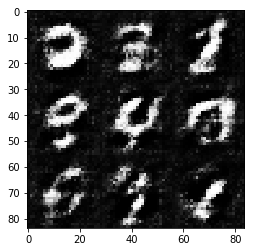

epoch 1/2 discriminator loss: 1.1492 generator loss: 0.8618
epoch 1/2 discriminator loss: 1.1295 generator loss: 1.0959
epoch 1/2 discriminator loss: 1.1524 generator loss: 1.5648
epoch 1/2 discriminator loss: 1.0823 generator loss: 1.5510
epoch 1/2 discriminator loss: 1.0704 generator loss: 1.2013
epoch 1/2 discriminator loss: 0.9382 generator loss: 1.7846
epoch 1/2 discriminator loss: 1.2340 generator loss: 0.6858
epoch 1/2 discriminator loss: 1.0132 generator loss: 0.8249
epoch 1/2 discriminator loss: 0.8098 generator loss: 1.3867
epoch 1/2 discriminator loss: 1.5327 generator loss: 0.4044


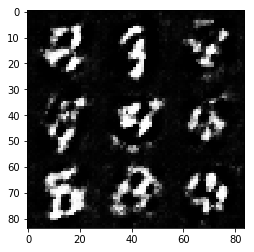

epoch 1/2 discriminator loss: 1.0244 generator loss: 0.8581
epoch 1/2 discriminator loss: 0.7254 generator loss: 1.7060
epoch 1/2 discriminator loss: 0.7724 generator loss: 2.0878
epoch 1/2 discriminator loss: 0.8459 generator loss: 1.1724
epoch 1/2 discriminator loss: 0.8206 generator loss: 1.1962
epoch 1/2 discriminator loss: 0.7314 generator loss: 1.6605
epoch 1/2 discriminator loss: 0.7481 generator loss: 1.9691
epoch 1/2 discriminator loss: 1.1776 generator loss: 0.6873
epoch 1/2 discriminator loss: 0.9321 generator loss: 0.9744
epoch 1/2 discriminator loss: 1.4494 generator loss: 0.5013


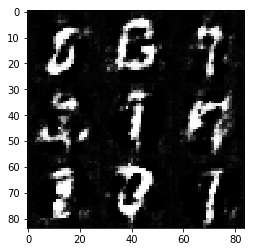

epoch 1/2 discriminator loss: 0.6252 generator loss: 1.7631
epoch 1/2 discriminator loss: 0.8785 generator loss: 1.0839
epoch 1/2 discriminator loss: 0.8312 generator loss: 1.4446
epoch 1/2 discriminator loss: 1.0438 generator loss: 0.8242
epoch 1/2 discriminator loss: 0.8609 generator loss: 1.1600
epoch 1/2 discriminator loss: 0.8974 generator loss: 1.1133
epoch 1/2 discriminator loss: 0.9148 generator loss: 1.0409
epoch 1/2 discriminator loss: 1.6177 generator loss: 0.4269
epoch 1/2 discriminator loss: 0.7604 generator loss: 1.5062
epoch 1/2 discriminator loss: 1.2607 generator loss: 0.6827


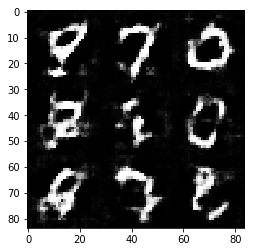

epoch 1/2 discriminator loss: 2.0107 generator loss: 0.2591
epoch 1/2 discriminator loss: 0.8185 generator loss: 1.3853
epoch 1/2 discriminator loss: 1.2913 generator loss: 0.6256
epoch 1/2 discriminator loss: 0.9973 generator loss: 0.8720
epoch 1/2 discriminator loss: 0.9527 generator loss: 1.0154
epoch 1/2 discriminator loss: 0.9776 generator loss: 1.4343
epoch 1/2 discriminator loss: 0.7860 generator loss: 1.3607
epoch 1/2 discriminator loss: 0.9679 generator loss: 1.0817
epoch 1/2 discriminator loss: 1.0765 generator loss: 1.0596
epoch 1/2 discriminator loss: 0.9923 generator loss: 0.8754


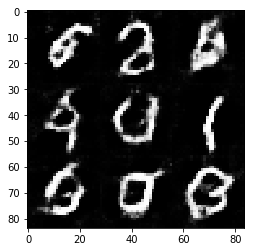

epoch 1/2 discriminator loss: 1.1082 generator loss: 0.7933
epoch 1/2 discriminator loss: 0.9818 generator loss: 0.8845
epoch 1/2 discriminator loss: 0.8296 generator loss: 1.5369
epoch 1/2 discriminator loss: 0.9400 generator loss: 1.0356
epoch 1/2 discriminator loss: 1.0182 generator loss: 1.8617
epoch 1/2 discriminator loss: 1.3042 generator loss: 2.1575
epoch 1/2 discriminator loss: 0.9732 generator loss: 1.0196
epoch 1/2 discriminator loss: 1.1541 generator loss: 0.7355
epoch 1/2 discriminator loss: 0.8392 generator loss: 1.5031
epoch 1/2 discriminator loss: 1.2357 generator loss: 0.6439


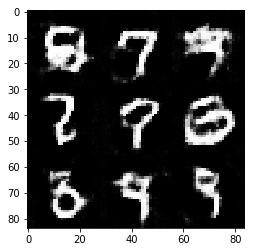

epoch 1/2 discriminator loss: 0.9080 generator loss: 1.1032
epoch 1/2 discriminator loss: 1.0025 generator loss: 1.0311
epoch 1/2 discriminator loss: 0.9665 generator loss: 1.0480
epoch 1/2 discriminator loss: 1.1376 generator loss: 0.7118
epoch 1/2 discriminator loss: 1.1505 generator loss: 0.7208
epoch 1/2 discriminator loss: 1.1064 generator loss: 0.8351
epoch 1/2 discriminator loss: 1.1256 generator loss: 0.8646
epoch 1/2 discriminator loss: 0.8566 generator loss: 1.2624
epoch 1/2 discriminator loss: 1.3123 generator loss: 0.6071
epoch 1/2 discriminator loss: 0.7987 generator loss: 1.2901


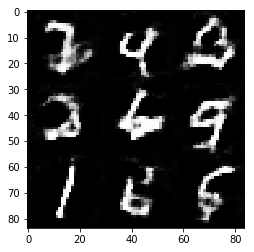

epoch 1/2 discriminator loss: 1.2334 generator loss: 0.6360
epoch 1/2 discriminator loss: 1.4526 generator loss: 0.4826
epoch 1/2 discriminator loss: 1.3217 generator loss: 0.5341
epoch 1/2 discriminator loss: 0.9294 generator loss: 1.0456
epoch 1/2 discriminator loss: 0.9851 generator loss: 2.0529
epoch 1/2 discriminator loss: 0.7402 generator loss: 1.8819
epoch 1/2 discriminator loss: 1.0287 generator loss: 0.9706
epoch 1/2 discriminator loss: 1.2227 generator loss: 0.6175
epoch 1/2 discriminator loss: 0.9958 generator loss: 1.1236
epoch 1/2 discriminator loss: 1.6655 generator loss: 0.3712


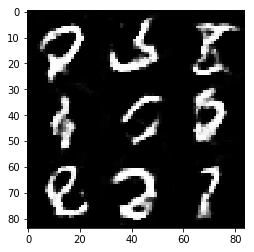

epoch 1/2 discriminator loss: 0.7854 generator loss: 1.2598
epoch 1/2 discriminator loss: 1.2447 generator loss: 0.6516
epoch 1/2 discriminator loss: 0.8492 generator loss: 1.1460
epoch 1/2 discriminator loss: 0.6845 generator loss: 1.5821
epoch 1/2 discriminator loss: 0.8441 generator loss: 1.1553
epoch 1/2 discriminator loss: 0.8481 generator loss: 1.2893
epoch 1/2 discriminator loss: 1.1018 generator loss: 0.7945
epoch 1/2 discriminator loss: 1.9717 generator loss: 0.2966
epoch 1/2 discriminator loss: 0.9158 generator loss: 1.0326
epoch 1/2 discriminator loss: 0.6401 generator loss: 1.7358


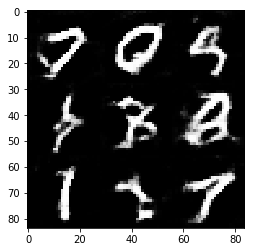

epoch 1/2 discriminator loss: 0.6894 generator loss: 1.9346
epoch 1/2 discriminator loss: 0.7656 generator loss: 1.3254
epoch 1/2 discriminator loss: 0.9182 generator loss: 1.0107
epoch 1/2 discriminator loss: 0.9353 generator loss: 1.1885
epoch 1/2 discriminator loss: 0.7787 generator loss: 1.5298
epoch 1/2 discriminator loss: 0.9261 generator loss: 0.9803
epoch 1/2 discriminator loss: 1.0061 generator loss: 0.9809
epoch 1/2 discriminator loss: 0.7915 generator loss: 1.9425
epoch 1/2 discriminator loss: 1.0445 generator loss: 0.8979
epoch 1/2 discriminator loss: 1.1813 generator loss: 0.7296


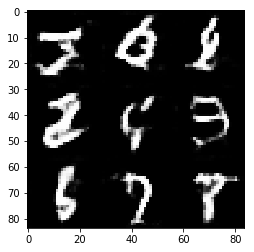

epoch 1/2 discriminator loss: 1.0922 generator loss: 0.8156
epoch 1/2 discriminator loss: 0.8208 generator loss: 1.7583
epoch 1/2 discriminator loss: 1.4016 generator loss: 0.5335
epoch 1/2 discriminator loss: 0.8644 generator loss: 1.0583
epoch 1/2 discriminator loss: 0.6619 generator loss: 1.5572
epoch 1/2 discriminator loss: 0.9679 generator loss: 0.9162
epoch 1/2 discriminator loss: 0.8946 generator loss: 1.0351
epoch 1/2 discriminator loss: 0.6521 generator loss: 1.5780
epoch 1/2 discriminator loss: 0.7991 generator loss: 1.2295
epoch 1/2 discriminator loss: 1.1341 generator loss: 0.7578


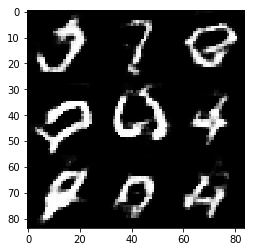

epoch 1/2 discriminator loss: 1.2554 generator loss: 0.7828
epoch 1/2 discriminator loss: 0.7265 generator loss: 1.5729
epoch 1/2 discriminator loss: 0.7779 generator loss: 1.3403
epoch 1/2 discriminator loss: 0.8237 generator loss: 1.1368
epoch 1/2 discriminator loss: 1.4018 generator loss: 0.5240
epoch 1/2 discriminator loss: 0.8779 generator loss: 1.1171
epoch 1/2 discriminator loss: 0.7180 generator loss: 1.4735
epoch 1/2 discriminator loss: 1.0018 generator loss: 0.8678
epoch 1/2 discriminator loss: 0.7900 generator loss: 1.2522
epoch 1/2 discriminator loss: 2.0340 generator loss: 0.3302


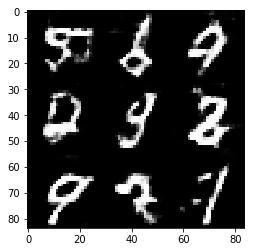

epoch 1/2 discriminator loss: 0.8459 generator loss: 1.0730
epoch 1/2 discriminator loss: 0.9877 generator loss: 0.9508
epoch 1/2 discriminator loss: 0.7644 generator loss: 1.2427
epoch 1/2 discriminator loss: 0.6484 generator loss: 1.5315
epoch 1/2 discriminator loss: 0.6844 generator loss: 2.3371
epoch 1/2 discriminator loss: 0.7884 generator loss: 1.2347
epoch 1/2 discriminator loss: 0.9814 generator loss: 0.8813
epoch 1/2 discriminator loss: 0.6151 generator loss: 1.6801
epoch 1/2 discriminator loss: 0.8485 generator loss: 1.0767
epoch 1/2 discriminator loss: 0.8412 generator loss: 1.1278


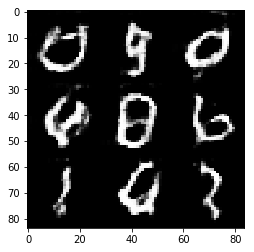

epoch 1/2 discriminator loss: 0.5909 generator loss: 2.1041
epoch 1/2 discriminator loss: 1.1474 generator loss: 0.9419
epoch 1/2 discriminator loss: 1.0119 generator loss: 1.0007
epoch 1/2 discriminator loss: 0.8803 generator loss: 1.3005
epoch 1/2 discriminator loss: 0.8255 generator loss: 1.1500
epoch 1/2 discriminator loss: 1.6820 generator loss: 0.3737
epoch 1/2 discriminator loss: 0.8793 generator loss: 1.0230
epoch 1/2 discriminator loss: 0.7493 generator loss: 1.3638
epoch 1/2 discriminator loss: 1.0109 generator loss: 0.8792
epoch 1/2 discriminator loss: 1.0769 generator loss: 0.8424


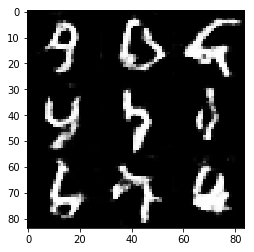

epoch 1/2 discriminator loss: 0.5967 generator loss: 2.0634
epoch 1/2 discriminator loss: 0.8354 generator loss: 1.2006
epoch 1/2 discriminator loss: 0.8979 generator loss: 2.1063
epoch 1/2 discriminator loss: 0.9331 generator loss: 0.9604
epoch 1/2 discriminator loss: 0.8869 generator loss: 1.0478
epoch 1/2 discriminator loss: 0.7831 generator loss: 1.5015
epoch 1/2 discriminator loss: 1.1619 generator loss: 0.7162
epoch 1/2 discriminator loss: 0.6196 generator loss: 1.7894
epoch 1/2 discriminator loss: 0.7740 generator loss: 1.6311
epoch 1/2 discriminator loss: 0.6451 generator loss: 2.1212


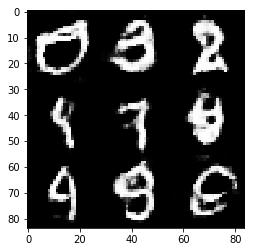

epoch 1/2 discriminator loss: 0.8413 generator loss: 1.1495
epoch 1/2 discriminator loss: 0.7913 generator loss: 1.1715
epoch 1/2 discriminator loss: 0.7623 generator loss: 1.4535
epoch 1/2 discriminator loss: 0.6483 generator loss: 1.7296
epoch 1/2 discriminator loss: 0.7901 generator loss: 1.1759
epoch 1/2 discriminator loss: 0.8570 generator loss: 1.2967
epoch 1/2 discriminator loss: 0.7791 generator loss: 1.2505
epoch 1/2 discriminator loss: 1.0248 generator loss: 0.8670
epoch 1/2 discriminator loss: 0.5883 generator loss: 1.9429
epoch 1/2 discriminator loss: 0.8697 generator loss: 1.0571


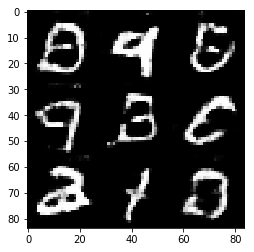

epoch 1/2 discriminator loss: 0.8179 generator loss: 1.9709
epoch 1/2 discriminator loss: 0.7373 generator loss: 1.3499
epoch 1/2 discriminator loss: 0.8224 generator loss: 1.1915
epoch 1/2 discriminator loss: 0.7124 generator loss: 1.3337
epoch 1/2 discriminator loss: 0.5421 generator loss: 1.9939


KeyboardInterrupt: 

In [13]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

epoch 1/1 discriminator loss: 1.2029 generator loss: 0.6820
epoch 1/1 discriminator loss: 2.0532 generator loss: 0.2697
epoch 1/1 discriminator loss: 0.7357 generator loss: 1.4134
epoch 1/1 discriminator loss: 1.0480 generator loss: 0.8082
epoch 1/1 discriminator loss: 1.2095 generator loss: 2.5855
epoch 1/1 discriminator loss: 1.0426 generator loss: 2.0564
epoch 1/1 discriminator loss: 1.1134 generator loss: 0.8019
epoch 1/1 discriminator loss: 1.4430 generator loss: 0.5223
epoch 1/1 discriminator loss: 1.1982 generator loss: 0.7568
epoch 1/1 discriminator loss: 1.0612 generator loss: 0.9299


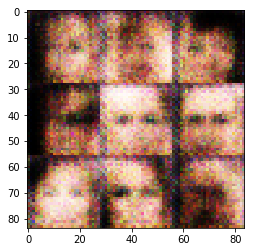

epoch 1/1 discriminator loss: 1.0748 generator loss: 0.7842
epoch 1/1 discriminator loss: 1.8633 generator loss: 0.2897
epoch 1/1 discriminator loss: 0.7201 generator loss: 1.4019
epoch 1/1 discriminator loss: 0.6767 generator loss: 1.7017
epoch 1/1 discriminator loss: 0.6749 generator loss: 2.1544
epoch 1/1 discriminator loss: 1.2773 generator loss: 0.6252
epoch 1/1 discriminator loss: 1.0681 generator loss: 0.7893
epoch 1/1 discriminator loss: 1.6749 generator loss: 0.3850
epoch 1/1 discriminator loss: 2.3637 generator loss: 4.8839
epoch 1/1 discriminator loss: 0.8699 generator loss: 1.1141


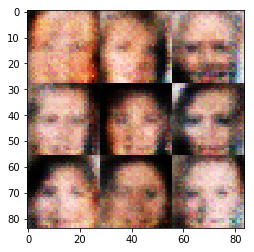

epoch 1/1 discriminator loss: 0.4449 generator loss: 2.7846
epoch 1/1 discriminator loss: 0.9291 generator loss: 0.9819
epoch 1/1 discriminator loss: 0.7937 generator loss: 1.2346
epoch 1/1 discriminator loss: 1.3707 generator loss: 0.5030
epoch 1/1 discriminator loss: 0.4745 generator loss: 3.8592
epoch 1/1 discriminator loss: 0.8701 generator loss: 1.2924
epoch 1/1 discriminator loss: 0.7486 generator loss: 1.2657
epoch 1/1 discriminator loss: 1.2947 generator loss: 2.5801
epoch 1/1 discriminator loss: 0.6599 generator loss: 1.5700
epoch 1/1 discriminator loss: 1.1019 generator loss: 2.0185


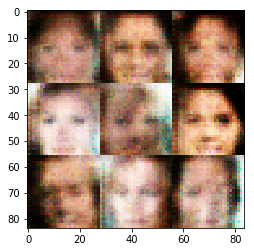

epoch 1/1 discriminator loss: 0.6360 generator loss: 1.7842
epoch 1/1 discriminator loss: 0.4001 generator loss: 3.4224
epoch 1/1 discriminator loss: 0.7851 generator loss: 1.1982
epoch 1/1 discriminator loss: 1.5055 generator loss: 2.9358
epoch 1/1 discriminator loss: 0.4818 generator loss: 2.7183
epoch 1/1 discriminator loss: 1.1728 generator loss: 1.1035
epoch 1/1 discriminator loss: 0.7090 generator loss: 1.6305
epoch 1/1 discriminator loss: 0.7294 generator loss: 1.3602
epoch 1/1 discriminator loss: 0.8293 generator loss: 1.4364
epoch 1/1 discriminator loss: 1.0516 generator loss: 0.8292


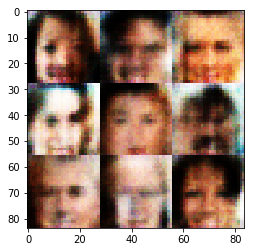

epoch 1/1 discriminator loss: 1.1205 generator loss: 0.7632
epoch 1/1 discriminator loss: 1.1802 generator loss: 2.5392
epoch 1/1 discriminator loss: 1.2326 generator loss: 1.2979
epoch 1/1 discriminator loss: 0.8742 generator loss: 2.6064
epoch 1/1 discriminator loss: 0.5457 generator loss: 2.1482
epoch 1/1 discriminator loss: 0.7921 generator loss: 1.2077
epoch 1/1 discriminator loss: 1.3941 generator loss: 0.6041
epoch 1/1 discriminator loss: 1.2450 generator loss: 0.6577
epoch 1/1 discriminator loss: 1.1340 generator loss: 0.7158
epoch 1/1 discriminator loss: 0.9040 generator loss: 0.9853


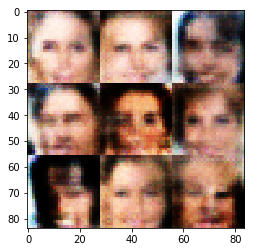

epoch 1/1 discriminator loss: 0.7407 generator loss: 2.0346
epoch 1/1 discriminator loss: 0.5774 generator loss: 1.7784
epoch 1/1 discriminator loss: 0.7259 generator loss: 1.3742
epoch 1/1 discriminator loss: 1.5115 generator loss: 0.6580
epoch 1/1 discriminator loss: 0.6070 generator loss: 1.7112
epoch 1/1 discriminator loss: 0.8727 generator loss: 1.3544
epoch 1/1 discriminator loss: 0.4106 generator loss: 3.8880
epoch 1/1 discriminator loss: 1.1850 generator loss: 0.6888
epoch 1/1 discriminator loss: 0.4172 generator loss: 3.1331
epoch 1/1 discriminator loss: 0.4701 generator loss: 6.5706


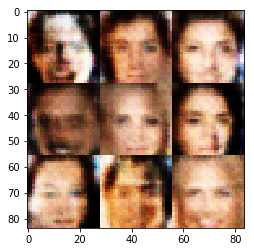

epoch 1/1 discriminator loss: 1.1715 generator loss: 0.7432
epoch 1/1 discriminator loss: 1.1554 generator loss: 0.6863
epoch 1/1 discriminator loss: 2.0363 generator loss: 0.2430
epoch 1/1 discriminator loss: 0.9838 generator loss: 3.9249
epoch 1/1 discriminator loss: 0.9456 generator loss: 1.1023
epoch 1/1 discriminator loss: 0.7794 generator loss: 1.2540
epoch 1/1 discriminator loss: 0.4194 generator loss: 2.8682
epoch 1/1 discriminator loss: 0.8262 generator loss: 1.1893
epoch 1/1 discriminator loss: 0.4552 generator loss: 3.0049
epoch 1/1 discriminator loss: 0.4271 generator loss: 4.8751


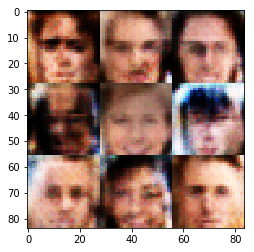

epoch 1/1 discriminator loss: 1.8913 generator loss: 0.2846
epoch 1/1 discriminator loss: 0.9441 generator loss: 0.9639
epoch 1/1 discriminator loss: 1.2543 generator loss: 0.6573
epoch 1/1 discriminator loss: 1.0389 generator loss: 0.8017
epoch 1/1 discriminator loss: 1.3024 generator loss: 0.6501
epoch 1/1 discriminator loss: 0.3685 generator loss: 4.5553
epoch 1/1 discriminator loss: 1.2197 generator loss: 0.7167
epoch 1/1 discriminator loss: 0.9744 generator loss: 0.8583
epoch 1/1 discriminator loss: 1.2030 generator loss: 0.6567
epoch 1/1 discriminator loss: 1.0026 generator loss: 3.0665


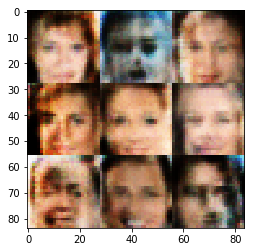

epoch 1/1 discriminator loss: 0.8326 generator loss: 1.5882
epoch 1/1 discriminator loss: 0.3891 generator loss: 3.7464
epoch 1/1 discriminator loss: 0.4971 generator loss: 3.1889
epoch 1/1 discriminator loss: 0.8753 generator loss: 1.2533
epoch 1/1 discriminator loss: 0.6187 generator loss: 2.0283
epoch 1/1 discriminator loss: 0.3953 generator loss: 3.1733
epoch 1/1 discriminator loss: 0.5954 generator loss: 1.6691
epoch 1/1 discriminator loss: 0.8278 generator loss: 1.0865
epoch 1/1 discriminator loss: 0.6642 generator loss: 1.5199
epoch 1/1 discriminator loss: 1.0021 generator loss: 0.8537


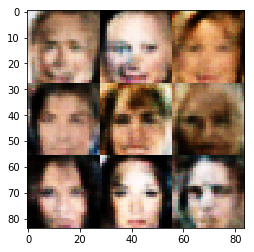

epoch 1/1 discriminator loss: 0.5072 generator loss: 2.5416
epoch 1/1 discriminator loss: 0.5835 generator loss: 1.6957
epoch 1/1 discriminator loss: 0.4577 generator loss: 2.4902
epoch 1/1 discriminator loss: 1.1292 generator loss: 1.4282
epoch 1/1 discriminator loss: 0.9249 generator loss: 1.4330
epoch 1/1 discriminator loss: 0.6155 generator loss: 2.1144
epoch 1/1 discriminator loss: 0.7619 generator loss: 3.5990
epoch 1/1 discriminator loss: 1.0472 generator loss: 4.0136
epoch 1/1 discriminator loss: 0.3609 generator loss: 4.2451
epoch 1/1 discriminator loss: 0.8972 generator loss: 0.9447


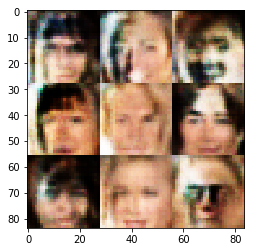

epoch 1/1 discriminator loss: 1.0573 generator loss: 0.7559
epoch 1/1 discriminator loss: 1.0415 generator loss: 0.8155
epoch 1/1 discriminator loss: 0.4029 generator loss: 4.8470
epoch 1/1 discriminator loss: 0.6082 generator loss: 2.4043
epoch 1/1 discriminator loss: 2.5406 generator loss: 0.1588
epoch 1/1 discriminator loss: 1.2150 generator loss: 0.9140
epoch 1/1 discriminator loss: 1.2339 generator loss: 0.7573
epoch 1/1 discriminator loss: 1.2637 generator loss: 0.6687
epoch 1/1 discriminator loss: 1.2498 generator loss: 0.7610
epoch 1/1 discriminator loss: 1.1929 generator loss: 0.7975


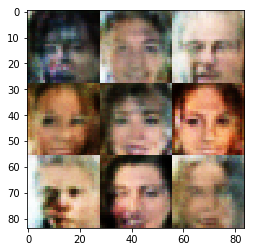

epoch 1/1 discriminator loss: 1.1676 generator loss: 0.8387
epoch 1/1 discriminator loss: 1.2644 generator loss: 0.5892
epoch 1/1 discriminator loss: 1.1337 generator loss: 0.9133
epoch 1/1 discriminator loss: 1.3827 generator loss: 0.6121
epoch 1/1 discriminator loss: 1.3711 generator loss: 0.6434
epoch 1/1 discriminator loss: 1.0453 generator loss: 1.0563
epoch 1/1 discriminator loss: 1.5386 generator loss: 0.4743
epoch 1/1 discriminator loss: 0.9655 generator loss: 1.0417
epoch 1/1 discriminator loss: 0.9905 generator loss: 1.3261
epoch 1/1 discriminator loss: 0.5437 generator loss: 2.6032


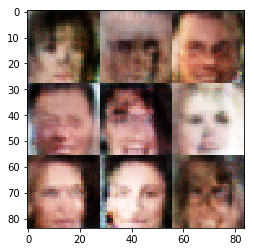

epoch 1/1 discriminator loss: 1.0069 generator loss: 0.8334
epoch 1/1 discriminator loss: 1.4335 generator loss: 0.4859
epoch 1/1 discriminator loss: 0.8485 generator loss: 1.0900


KeyboardInterrupt: 

In [14]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.